In [1]:
from pycap import PropertyTree,EnergyStorageDevice
from pycap import measure_impedance_spectrum
from numpy import pi,real,imag,log10,absolute,angle,linalg,inf
from matplotlib import pyplot
%matplotlib inline

In [2]:
R  =100.456   # ohm
R_L=4136.15   # ohm
C  =0.0262473 # farad

def setup_eis_database():
    eis_database=PropertyTree()
    eis_database.put_double('frequency_upper_limit',1e+2)
    eis_database.put_double('frequency_lower_limit',1e-6)
    eis_database.put_int   ('steps_per_decade'     ,10)
    eis_database.put_int   ('steps_per_cycle'      ,1024)
    eis_database.put_int   ('cycles'               ,1)
    eis_database.put_int   ('ignore_cycles'        ,0)
    eis_database.put_double('dc_voltage'           ,0)
    eis_database.put_string('harmonics'            ,'3')
    eis_database.put_string('amplitudes'           ,'5e-3')
    eis_database.put_string('phases'               ,'0')
    return eis_database

def plot_nyquist_and_bode(f,Z_computed,Z_exact):
    label_fontsize=30
    tick_fontsize=20
    labelx=-0.05
    labely=0.5
    plot_linewidth=3
    # Nyquist plot
    pyplot.figure(figsize=(15,15))
    pyplot.plot(real(Z_computed),-imag(Z_computed),'r-s',lw=plot_linewidth)
    pyplot.plot(real(Z_exact),-imag(Z_exact),'k--o',lw=plot_linewidth)
    pyplot.axis('equal')
    pyplot.xlabel(r'$\mathrm{Resistance\ [\Omega]}$',fontsize=label_fontsize)
    pyplot.ylabel(r'$\mathrm{-Reactance\ [\Omega]}$',fontsize=label_fontsize)
    pyplot.gca().xaxis.set_tick_params(labelsize=tick_fontsize)
    pyplot.gca().yaxis.set_tick_params(labelsize=tick_fontsize)
    # Bode plot
    fig,axarr=pyplot.subplots(2,sharex=True,figsize=(16,12))
    axarr[0].plot(f,20*log10(absolute(Z_computed)),'r-s',lw=plot_linewidth)
    axarr[0].plot(f,20*log10(absolute(Z_exact)),'k--o',lw=plot_linewidth)
    axarr[0].set_xscale('log')
    axarr[0].set_ylabel(r'$\mathrm{Magnitude\ [dB]}$',fontsize=label_fontsize)
    axarr[0].get_yaxis().set_tick_params(labelsize=tick_fontsize)
    axarr[0].yaxis.set_label_coords(labelx,labely)
    axarr[1].plot(f,angle(Z_computed)*180/pi,'r-s',lw=plot_linewidth)
    axarr[1].plot(f,angle(Z_exact)*180/pi,'k--o',lw=plot_linewidth)
    axarr[1].set_xscale('log')
    axarr[1].set_ylabel(r'$\mathrm{Phase\ [Degrees]}$',fontsize=label_fontsize)
    axarr[1].set_xlabel(r'$\mathrm{Frequency\ [Hz]}$',fontsize=label_fontsize)
    axarr[1].get_yaxis().set_tick_params(labelsize=tick_fontsize)
    axarr[1].get_xaxis().set_tick_params(labelsize=tick_fontsize)
    axarr[1].yaxis.set_label_coords(labelx,labely)

# SeriesRC
The exact answer is given by:
\begin{equation}
Z_{exact} = R + \frac{1}{jC 2\pi f}
\end{equation}
The two errors computed are
$\left\| \arg\left(Z_{computed}\right)-\arg\left(Z_{exact}\right) \right\|_\infty$
and
$\left\| 20\log_{10}\left|Z_{computed}\right|-20\log_{10}\left|Z_{exact}\right| \right\|_\infty$.



max_phase_error_in_degree = 0.523758790354
max_magniture_error_in_decibel = 0.0523159528402


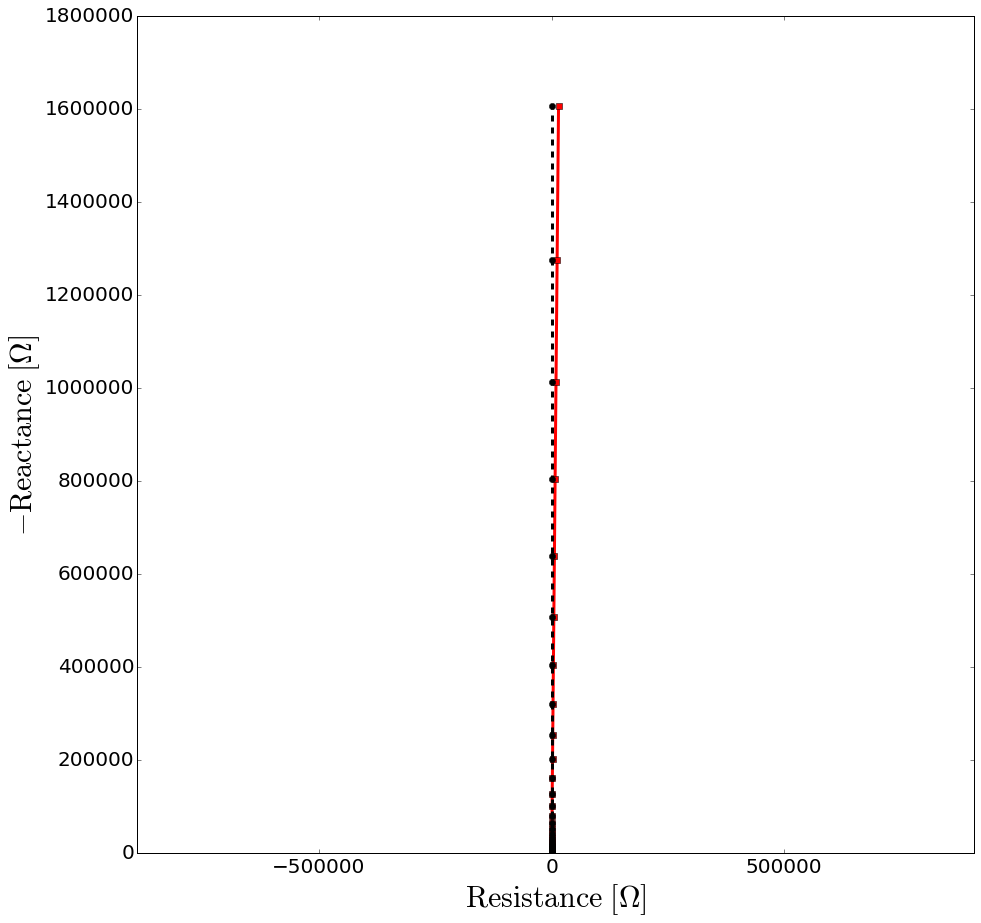

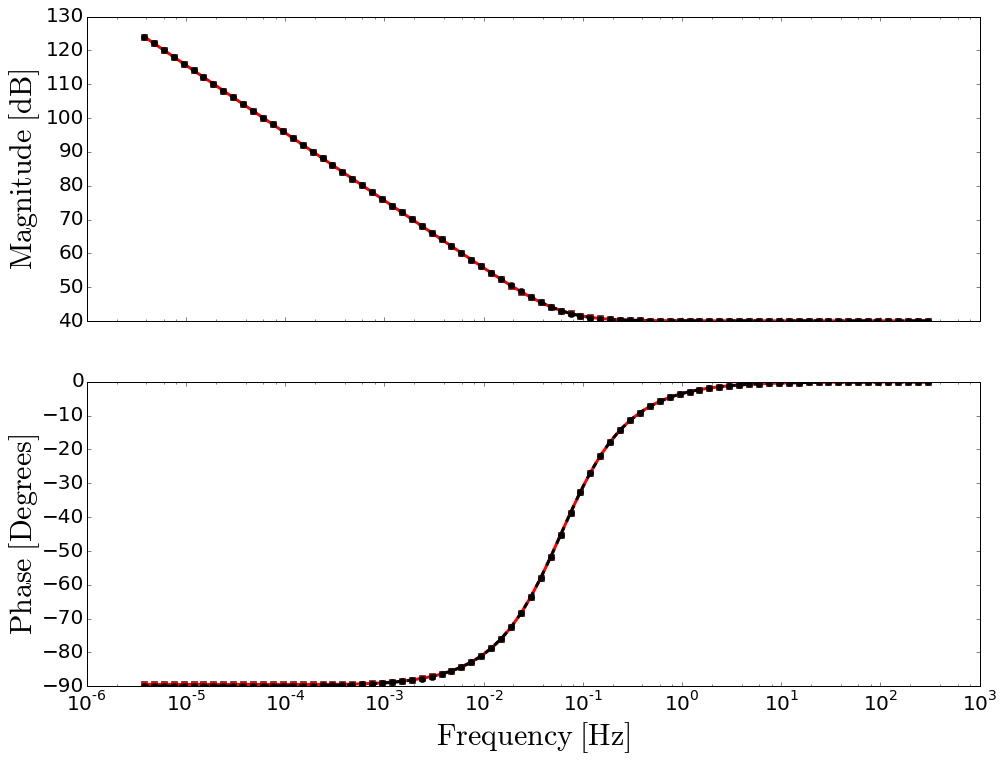

In [3]:
# make a series RC equivalent circuit
device_database=PropertyTree()
device_database.put_string('type','SeriesRC')
device_database.put_double('series_resistance',R)
device_database.put_double('capacitance'      ,C)
device=EnergyStorageDevice(device_database)
# setup the experiment
eis_database=setup_eis_database()
# measure the impedance spectrum
impedance_spectrum_data=measure_impedance_spectrum(device,eis_database)
f=impedance_spectrum_data['frequency']
Z_computed=impedance_spectrum_data['impedance']
# compute the exact answer
Z_exact=R+1/(1j*C*2*pi*f)
# compare computed complex impedance to exact
max_phase_error_in_degree=linalg.norm(angle(Z_computed,deg=True)-angle(Z_exact,deg=True),inf)
max_magniture_error_in_decibel=linalg.norm(20*log10(absolute(Z_computed))-20*log10(absolute(Z_exact)),inf)
print 'max_phase_error_in_degree =',max_phase_error_in_degree
print 'max_magniture_error_in_decibel =',max_magniture_error_in_decibel
assert max_phase_error_in_degree<1
assert max_magniture_error_in_decibel<0.2
# plot
plot_nyquist_and_bode(f,Z_computed,Z_exact)

# ParallelRC

\begin{equation}
Z_{exact} = R + \frac{R_L}{1+j R_LC 2\pi f}
\end{equation}

max_phase_error_in_degree = 0.0242049004285
max_magniture_error_in_decibel = 0.0509448679541


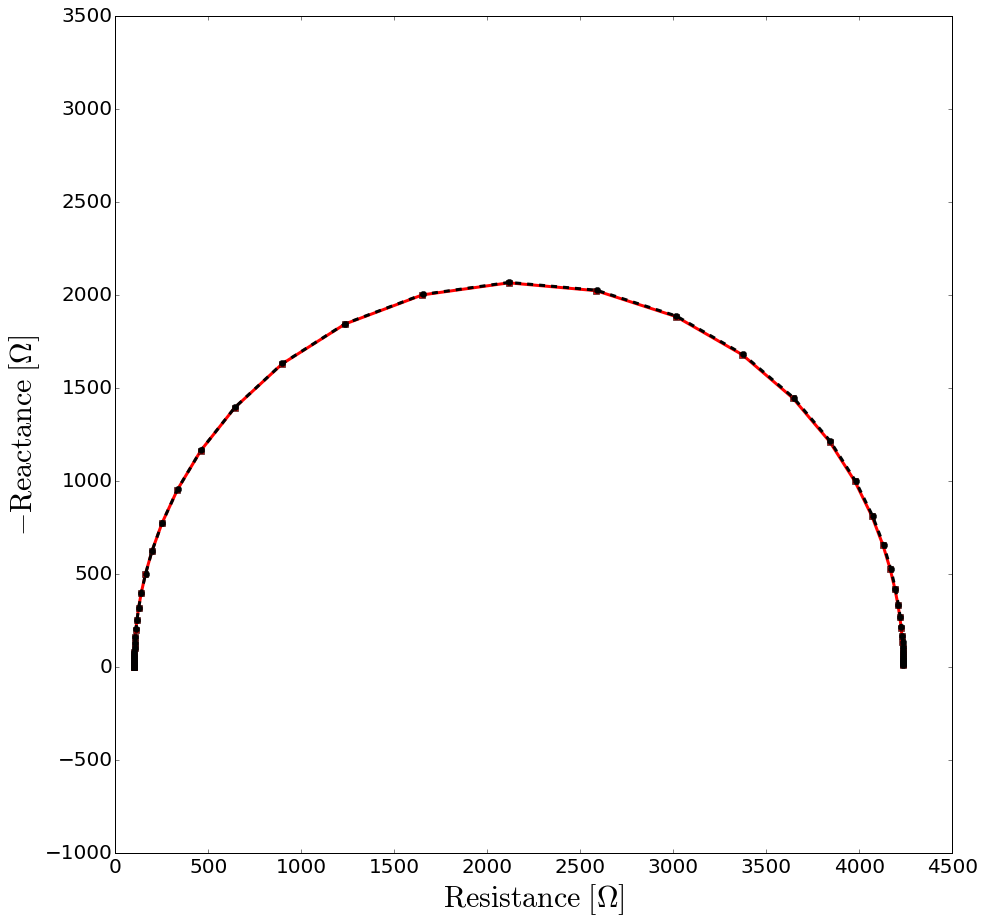

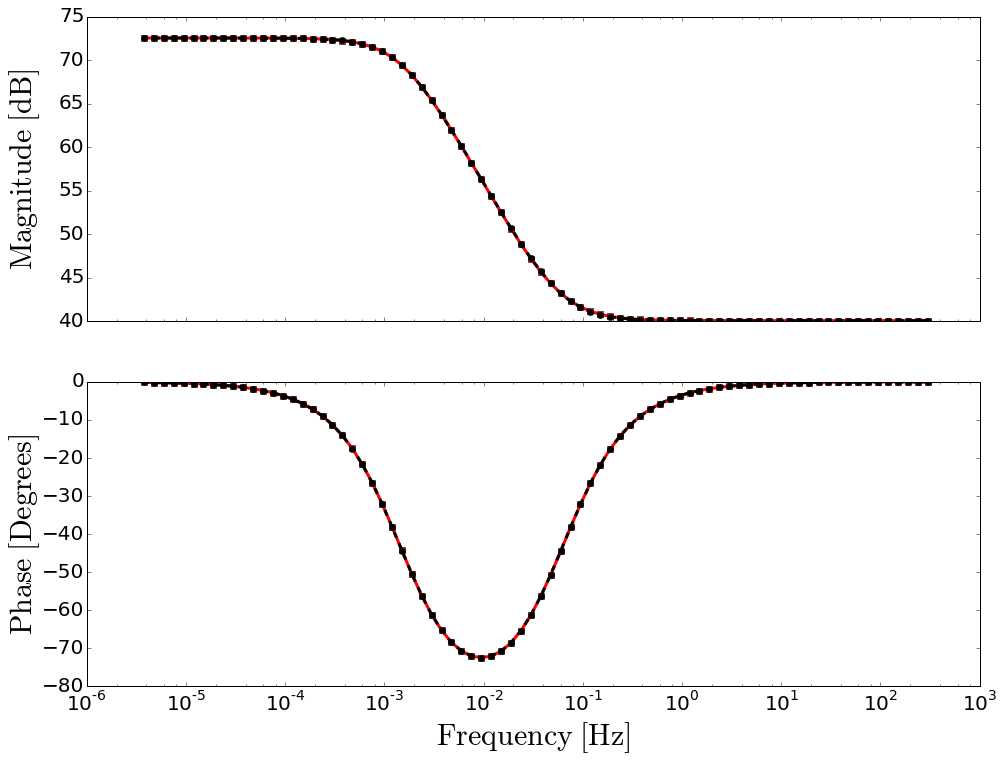

In [4]:
# make a parallel RC equivalent circuit
device_database=PropertyTree()
device_database.put_string('type','ParallelRC')
device_database.put_double('series_resistance'  ,R  )
device_database.put_double('parallel_resistance',R_L)
device_database.put_double('capacitance'        ,C  )
device=EnergyStorageDevice(device_database)
# setup the experiment
eis_database=setup_eis_database()
# measure the impedance spectrum
impedance_spectrum_data=measure_impedance_spectrum(device,eis_database)
f=impedance_spectrum_data['frequency']
Z_computed=impedance_spectrum_data['impedance']
# compute the exact answer
Z_exact=R+R_L/(1+1j*R_L*C*2*pi*f)
# compare computed complex impedance to exact
max_phase_error_in_degree=linalg.norm(angle(Z_computed,deg=True)-angle(Z_exact,deg=True),inf)
max_magniture_error_in_decibel=linalg.norm(20*log10(absolute(Z_computed))-20*log10(absolute(Z_exact)),inf)
print 'max_phase_error_in_degree =',max_phase_error_in_degree
print 'max_magniture_error_in_decibel =',max_magniture_error_in_decibel
assert max_phase_error_in_degree<1
assert max_magniture_error_in_decibel<0.2
# plot
plot_nyquist_and_bode(f,Z_computed,Z_exact)